Read in dataset

In [ ]:
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/ML/Project/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dataset

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


Drop all samples that are not considered physically hazardous from the dataframe

In [ ]:
data = dataset[(dataset['pha'] == "Y")]
data

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
1565,Icarus,1.078095,0.826928,22.826494,88.004724,31.380821,0.186588,1.969601,1.119421,25593.0,0,1008,16.900,Y,Y,1.0,NaN,0.51,2.27260,NaN,0.774,0.520,NaN,NaN,NaN,NaN,0.034275,APO,0.880479,408.868580,199.925955
1619,Geographos,1.245302,0.335441,13.337348,337.195400,276.915035,0.827577,1.663027,1.389698,24903.0,0,4449,15.600,Y,Y,2.56,5.0x2.0x2.1,0.29,5.22204,NaN,0.862,0.471,NaN,S,S,NaN,0.029829,APO,0.709238,507.587166,311.532967
1861,Apollo,1.470045,0.559823,6.355123,35.630545,285.970752,0.647079,2.293011,1.782396,32277.0,0,1681,16.250,Y,Y,1.5,NaN,0.25,3.06500,NaN,0.819,0.481,NaN,Q,Q,0.09,0.025921,APO,0.552978,651.020130,227.379826
1980,Midas,1.776600,0.650353,39.826896,356.886302,267.797740,0.621182,2.932017,2.368059,16761.0,0,910,15.200,Y,Y,3.4,NaN,NaN,5.22000,NaN,NaN,NaN,NaN,V,NaN,NaN,0.003711,APO,0.416217,864.933552,146.268712
2100,Adonis,1.874230,0.764422,1.323673,349.570099,43.550566,0.441527,3.306933,2.565917,30009.0,0,126,18.800,Y,Y,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011622,APO,0.384122,937.201107,182.529745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839539,NaN,2.275157,0.842180,4.993691,226.421186,297.729427,0.359065,4.191250,3.431827,11.0,8,46,21.937,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006780,APO,0.287202,1253.474652,344.037968
839574,NaN,1.519163,0.327111,12.483794,188.591468,155.155912,1.022229,2.016098,1.872470,4.0,8,23,21.558,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039600,AMO,0.526377,683.919833,35.564429
839645,NaN,1.984984,0.737657,33.581588,38.820814,257.133890,0.520747,3.449220,2.796686,1.0,9,28,21.395,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047545,APO,0.352427,1021.489395,17.388067
839697,NaN,2.098598,0.846732,10.421247,260.210604,288.045149,0.321647,3.875549,3.040200,5.0,9,22,19.566,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030428,APO,0.324198,1110.433114,331.708570


Simple data management and preprocessing.

Encode categorical columns using dictionaries and label encoder.
Drop unecessary columns from dataframe.

In [ ]:
from sklearn.preprocessing import LabelEncoder as le

data['pha'] = data['pha'].map({'Y': 1, 'N': 0})
data['neo'] = data['neo'].map({'Y': 1, 'N': 0})
data['condition_code'] = data['condition_code'].map({0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 'D': 11, 'E': 12})
data['class'] = le().fit_transform(data['class'])

columns_c = ['name', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'G', 'UB', 'IR', 'spec_B', 'spec_T', 'diameter', 'w', 'per', 'ma']
data = data.drop(columns=columns_c)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
data.dropna(how='all', axis=1, inplace=True)
data.dropna(how='any', axis=0, inplace=True)

In [ ]:
x = data.values
y = data['pha'].values

Set up for the VAE:

  sampling function
  
  scaling of data

In [ ]:
from tensorflow.keras import backend as K

def sampling(z_params):
        z_mean, z_log_var = z_params
        batch = K.shape(z_mean)[0]
        dims = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dims))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
import numpy as np

sc = StandardScaler()
sc.fit(x)
x_train = sc.transform(x)
og_dim = x_train.shape[1]
og_dim

16

In [ ]:
x_train

array([[-1.01467967,  1.85854102,  0.6996742 , ...,  0.79129946,
        -0.16201048,  0.90361791],
       [-0.70698682, -0.95722136, -0.05168687, ...,  0.48230497,
        -0.16201048,  0.37129872],
       [-0.29341895,  0.32828274, -0.60454714, ...,  0.21076204,
        -0.16201048, -0.11444981],
       ...,
       [ 0.77096247,  1.37497473, -0.81979394, ..., -1.56172388,
        -0.16201048, -0.78840775],
       [ 0.46967448,  1.57332602, -0.14203208, ...,  0.79837418,
        -0.16201048, -0.6493184 ],
       [ 2.05990634,  0.81241257, -0.16683184, ...,  1.62832691,
        -0.16201048, -1.16118874]])

In [ ]:
import math
input_shape = (og_dim, )
inter_dim = 15
batch_size = math.ceil(math.sqrt(x_train.shape[0]))
latent_dim = 2
epochs = 300

Setup for the VAE: 

  encoder

In [ ]:
from tensorflow.keras.layers import Lambda, Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

inputs = Input(shape=input_shape)
bn = BatchNormalization()(inputs)
dp = Dropout(0.2)(bn)
q = Dense(inter_dim, activation='sigmoid')(dp)
q = Dropout(0.2)(q)

In [ ]:
z_mean = Dense(latent_dim)(q)
z_log_var = Dense(latent_dim)(q)
z_params = [z_mean, z_log_var]
z = Lambda(sampling, output_shape=(latent_dim,))(z_params)

In [ ]:
encoder = Model(inputs, [z_mean, z_log_var, z])

decoder

In [ ]:
latent_inputs = Input(shape=(latent_dim,))
q = Dense(inter_dim, activation='relu')(latent_inputs)
r_outputs = Dense(og_dim)(q)

In [ ]:
decoder = Model(latent_inputs, r_outputs)

Variational Autoencoder

In [ ]:
outputs = decoder(encoder(inputs)[2])

vae = Model(inputs, outputs)

In [ ]:
from tensorflow.keras.losses import mse
r_loss = mse(inputs,outputs)
r_loss = og_dim * r_loss

Compile VAE and fit to data

In [ ]:
vae.compile(loss='binary_crossentropy', optimizer='adam')

history = vae.fit(x_train, x_train, epochs=epochs,batch_size=batch_size, validation_data=(x_train,x_train))

Epoch 1/300
31/31 [==============================] - 1s 11ms/step - loss: 0.1118 - val_loss: -0.0400
Epoch 2/300
31/31 [==============================] - 0s 5ms/step - loss: -0.0262 - val_loss: -0.0906
Epoch 3/300
31/31 [==============================] - 0s 5ms/step - loss: -0.0849 - val_loss: -0.1695
Epoch 4/300
31/31 [==============================] - 0s 4ms/step - loss: -0.1781 - val_loss: -0.2062
Epoch 5/300
31/31 [==============================] - 0s 5ms/step - loss: -0.0959 - val_loss: -0.2185
Epoch 6/300
31/31 [==============================] - 0s 4ms/step - loss: -0.1024 - val_loss: -0.2519
Epoch 7/300
31/31 [==============================] - 0s 3ms/step - loss: -0.2293 - val_loss: -0.2651
Epoch 8/300
31/31 [==============================] - 0s 5ms/step - loss: -0.2749 - val_loss: -0.3150
Epoch 9/300
31/31 [==============================] - 0s 4ms/step - loss: -0.2415 - val_loss: -0.3765
Epoch 10/300
31/31 [==============================] - 0s 4ms/step - loss: -0.2620 - val_los

Plot of the loss for training and validation

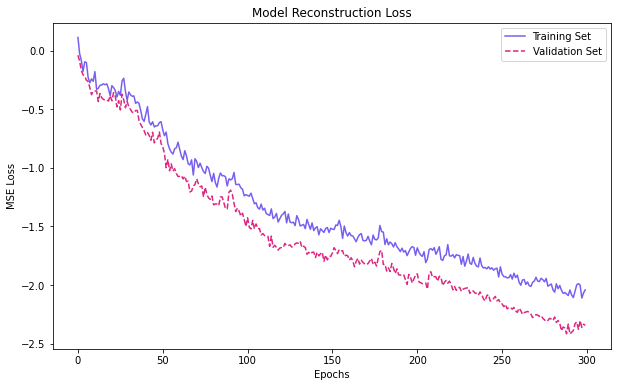

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], color='#785ef0')
plt.plot(history.history['val_loss'], '--', color='#dc267f')
plt.title('Model Reconstruction Loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.show()

Generating data using the VAE

In [ ]:
import numpy as np

In [ ]:
encdd = encoder.predict(x_train)
x_hat = decoder.predict(encdd[0])

In [ ]:
def generate_samples(N=10, latend_dim = 2):
        noise = np.random.uniform(-2.0, 2.0, (N,latent_dim))
        gen = decoder.predict(noise)
        return gen

In [ ]:
gen = generate_samples(6000, latent_dim)

In [ ]:
gen

array([[-0.45976895,  0.10558507,  0.05433178, ..., -0.481144  ,
        -0.57403725, -0.31245017],
       [-0.74723244, -0.22505768,  0.3271051 , ..., -0.25526145,
        -0.43545547,  0.03696901],
       [-1.7487006 , -0.710349  , -0.30381352, ..., -1.7996763 ,
         0.50227535,  1.2723387 ],
       ...,
       [-0.52585346,  0.5982963 , -0.37925643, ..., -0.6959547 ,
        -0.6138645 , -1.5324637 ],
       [-0.55518216,  0.4034568 , -0.3676498 , ..., -0.670062  ,
        -0.4308877 , -1.0204138 ],
       [-1.5142536 , -1.1433444 ,  0.5777633 , ..., -0.2781403 ,
         0.47237724,  1.0383723 ]], dtype=float32)

Inverse transform the generated data to compare to original data

In [ ]:
np.set_printoptions(suppress=True)
new_data = np.around(sc.inverse_transform(gen), decimals=1)

In [ ]:
new_df = pd.DataFrame(new_data, columns = ['a', 'e', 'i', 'om', 'q', 'ad', 'per_y', 'data_arc', 'condition_code',
       'n_obs_used', 'H', 'neo', 'pha', 'moid', 'class', 'n'])

In [ ]:
new_df

,a,e,i,om,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n
0,1.4,0.5,14.700000,152.800003,0.8,2.4,2.1,6819.299805,1.2,437.299988,18.900000,0.9,0.3,0.0,0.8,0.5
1,1.2,0.5,18.100000,134.000000,0.8,2.5,1.6,8096.500000,1.4,635.099976,18.799999,0.8,0.3,0.0,0.9,0.6
2,0.7,0.4,10.200000,154.300003,0.6,1.9,1.5,4270.100098,-0.3,-179.899994,20.299999,0.9,0.7,-0.0,1.3,1.0
3,0.8,0.4,9.600000,162.600006,0.7,2.0,1.6,3972.800049,-0.3,-116.400002,20.299999,0.9,0.8,-0.0,1.2,0.9
4,1.4,0.6,10.700000,165.199997,0.8,1.9,3.1,4594.299805,0.3,343.000000,19.500000,0.6,0.4,0.0,0.8,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.3,0.6,9.800000,162.699997,0.8,1.8,3.4,4210.799805,-0.1,342.799988,19.600000,0.5,0.3,0.0,0.8,0.1
5996,1.1,0.4,10.400000,169.800003,0.7,2.3,1.8,4325.200195,0.2,80.199997,20.000000,0.9,0.8,0.0,1.1,0.8
5997,1.3,0.6,9.200000,158.899994,0.8,1.7,3.5,3898.399902,-0.3,348.600006,19.700001,0.4,0.4,0.0,0.8,0.1
5998,1.3,0.6,9.300000,156.500000,0.8,1.9,3.0,3417.600098,-0.4,309.700012,20.000000,0.6,0.6,0.0,0.9,0.3


Create new dataframe with original data + generated data

Overwrite values for 'pha' since they should all be 1

In [ ]:
for sample in range(0, len(new_df)):
    new_df.iloc[sample]['pha'] = 1
    new_df.iloc[sample]['neo'] = 1
    new_df.iloc[sample]['condition_code'] = round(new_df.iloc[sample]['condition_code'],0)
    new_df.iloc[sample]['class'] = round(new_df.iloc[sample]['class'],0)

In [ ]:
new_df = pd.concat([new_df,dataset], axis=0, ignore_index=True)

Compare original data to new data.

The means look okay, worried about 'data_arc' and 'condition_code' columns since their stats are largely off.

In [ ]:
data.describe()

,a,e,i,om,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.0,976.0,976.000000,976.000000,976.000000
mean,1.629496,0.502522,13.990116,174.208978,0.755894,2.503098,2.166012,5478.462090,1.728484,366.067623,19.423668,1.0,1.0,0.022888,1.064549,0.589795
std,0.543703,0.174638,12.635751,101.393970,0.218880,1.030184,1.074204,4820.608061,1.852801,507.229350,1.600561,0.0,0.0,0.014397,0.398630,0.321853
min,0.635232,0.065199,0.146163,0.086611,0.092870,0.959063,0.506299,1.000000,1.000000,14.000000,14.000000,1.0,1.0,0.000047,0.000000,0.161358
25%,1.203076,0.374092,4.837077,85.840703,0.616692,1.628273,1.319618,2366.500000,1.000000,117.000000,18.400000,1.0,1.0,0.010521,1.000000,0.348871
50%,1.544489,0.515976,9.408570,167.546679,0.817470,2.358419,1.919488,4763.500000,1.000000,218.000000,19.600000,1.0,1.0,0.022257,1.000000,0.513484
75%,1.998448,0.624271,19.804329,261.195511,0.934633,3.185851,2.825190,6904.000000,1.000000,416.250000,20.700000,1.0,1.0,0.034418,1.000000,0.746909
max,3.341513,0.955961,75.377946,359.849201,1.054989,6.120684,6.108337,32277.000000,10.000000,6102.000000,22.100000,1.0,1.0,0.049977,3.000000,1.946729


In [ ]:
new_df.describe()

,a,e,i,om,q,ad,per_y,data_arc,n_obs_used,H,moid,n,w,albedo,rot_per,GM,BV,UB,IR,G,per,ma
count,845712.000000,845714.000000,845714.000000,845714.000000,845714.000000,845708.000000,845713.000000,830240.000000,845714.000000,843025.000000,829272.000000,8.457120e+05,839714.000000,136409.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.397080e+05,839706.000000
mean,2.745729,0.157929,8.987643,168.312144,2.393071,3.376982,6.825528,5693.195284,259.952614,16.804608,1.413073,2.398637e-01,181.075796,0.130067,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,2.505533e+03,180.659892
std,113.978566,0.097688,6.670059,102.787248,2.229512,12.703860,251.368129,4199.314621,371.294394,1.828873,2.245537,8.830242e-02,104.023854,0.109994,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.070511,0.773684,0.000000,0.000000,-362.200012,-1.100000,0.000000,2.926897e-08,0.001666,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,1.511339e+02,-67.136826
25%,2.381131,0.091830,4.091712,80.662370,1.966778,2.769281,3.674371,3616.000000,50.000000,15.900000,0.973190,1.902693e-01,91.041603,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,1.345555e+03,86.642618
50%,2.641934,0.144384,7.314697,160.036370,2.221255,3.033352,4.294287,5806.000000,119.000000,16.800000,1.233325,2.294469e-01,181.669478,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.570524e+03,181.517775
75%,2.993456,0.200775,12.303664,251.325529,2.575732,3.355380,5.179253,7280.000000,300.000000,17.600000,1.588030,2.681270e-01,271.521717,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,79.501300,2.381994e+00,359.999833,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,6.131733e+07,491.618014


original data

| | a |	e |	i |	om |	q |	ad |	per_y |	data_arc |	condition_code |	n_obs_used |	H |	neo |	pha |	moid |	class |	n |
|------ | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
| count	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.000000	| 1076.0	| 1076.0	| 1076.000000	| 1076.00000	| 1076.000000 |
| mean	| 1.570993	| 0.548756	| 12.782856	| 158.111490	| 0.778580	| 2.363405	| 2.057646	| 4969.404275	| 1.660781	| 332.139405	| 17.711431	| 1.0	| 1.0	| 0.113698	| 1.05855	| 0.627919 |
| std	| 0.549136	| 0.220326	| 12.611428	| 108.884538	| 0.220181	| 1.073868	| 1.077633	| 4858.818895	| 1.777164	| 494.564315	| 5.564534	| 0.0	| 0.0	| 0.284161	| 0.38010	| 0.328864 |


new_data


| | a |	e |	i |	om |	q |	ad |	per_y |	data_arc |	condition_code |	n_obs_used |	H |	neo |	pha |	moid |	class |	n |
|------ | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
| count | 1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.000000 |	1176.0 |	1176.000000 |	1176.000000 |	1176.000000 |
|mean	| 1.582558	| 0.546056	| 12.647834	| 158.912383	| 0.780061	| 2.408864	| 2.099683	| 4967.245833	| 1.710884	| 317.770578	| 17.814711	| 0.959099	| 1.0	| 0.104030	| 1.050255	| 0.611344 |
| std	| 0.530422	| 0.211897	| 12.082260	| 104.666288	| 0.211784	| 1.043321	| 1.046778	| 4670.214634	| 1.725346	| 476.338905	| 5.334264	| 0.150355	| 0.0	0.273646	| 0.365769	| 0.322200 |

Store whole dataset as csv to be used in classification problem.

In [ ]:
new_df.to_csv('/content/drive/MyDrive/ML/Project/Asteroid_VAE_data.csv')